# MCT4052 Workshop 3c: Artificial Neural Network Classifier

*Author: Stefano Fasciani, stefano.fasciani@imv.uio.no, Department of Musicology, University of Oslo.*

This notebook shows how to train and use an ANN (within the scikit learn package) for classification purposes. The dataset, features extraction and classification problem are identical to the example in Workshop2c, but we replace the Gaussian naïve Bayesian classifier with a Multi Layer Perceptron (MLP, i.e. a Feed Forward fully-connected ANN). Also, the feature set has been slightly changed compared to Workshop2c.


When working with neural networks (for both regression and classification tasks) there are many hyper-parameters we can tune (architecture, activation function, learning rate, etc..).

To get a basic understanding of how these may impact the result, explore this **[demo](https://playground.tensorflow.org/)**.

In particular here we use the [MLP Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) which is an ANN designed to solve classification tasks. We can customize everything except the actual output layer, which is designed to produce one (or more, but this is unusual) discrete or binary labels (e.g. integer numbers).

If you want to learn more about the softmax (activation function for MLP Classifier neurons in the output layer), you can read this [post](https://towardsdatascience.com/softmax-activation-function-explained-a7e1bc3ad60).

In [1]:
import numpy as np
import pandas as pd
import librosa, librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
import IPython.display as Ipd
import os
import sklearn

%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
#loading the metadata in a pandas data structure and displaying
metadata = pd.read_csv('./data/examples4/meta.csv')

In [3]:
#finding unique labels (i.e. how many different classes in the dataset)
classes = list(metadata.label.unique()) # finding unique elements in the 'label' column
print('There are',len(classes),'different classes:',classes)

There are 5 different classes: ['cello', 'guitar', 'clarinet', 'flute', 'harmonica']


In [4]:
sr = 22050

#Instead of writing the code to extract the features we define a function,
#which is more elegant, it's reusable (shorter code) and makes the following code more readable.
#All features are from librosa and are all scalar (we take the mean over multiple blocks computed across the duration, which differs for each file).
#The function returns a list containing the mean of the features given an filename, and the sampling rate at which we are resampling the file
#Mind that these features may not be the best to perform the classification task (it's just an example!)
def extract_features(filename, sr):
    
    signal, dummy = librosa.load(filename, sr, mono=True)
    
    output = np.mean(librosa.feature.mfcc(signal, n_mfcc=20), axis=1)
    
    return output

print('number of files in database',len(metadata.index))
#creating an array of zeros of the proper size where we will store computed features and lables
features = np.zeros((len(metadata.index),20)) #we compute the average of 3 features in the above code
labels = np.zeros((len(metadata.index))) #we store the labels as integers

#iterating over the rows of metadata
for i, row in metadata.iterrows():
    #print('processing',row['filename'])
    features[i,:] = extract_features('./data/examples4/'+row['filename'], sr)
    labels[i] = (classes.index(row['label']))

print('Done!')

number of files in database 60
Done!


In [5]:
#this step converts the labels from a numpy array to 
#a Pandas series, which allows backtracing misclassified examples
#scikitlearn can handle features or labels also as Pandas formats
labels = pd.Series(labels)

In [6]:
from sklearn.model_selection import train_test_split

#splitting the dataset in training and testing parts
feat_train, feat_test, lab_train, lab_test = train_test_split(features, labels, test_size=0.2, random_state=52)

In [7]:
#learning the scaling transformation from the train data and applying it to both train and test set.

#creating scaling object
scaler = sklearn.preprocessing.StandardScaler()

#learning scaling from train set
scaler.fit(feat_train)

#applying scaling to both train and test set
feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

### Creating, training and testing the Multi Layer Perceptron (MLP) classifier

Compared to other classifiers, here we can specify more options such as the architecture of the network, the activation function of the perceptrons, the maximum number of iterations/epochs, etc).

In [8]:
#Import the classifier
from sklearn.neural_network import MLPClassifier

##Creating an instance of a MLP classifier
#and setting it some option (max mum epoch, verbose on, activation of neurons)
mlp = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=2000, activation='relu', verbose=True)

#train the model
mlp.fit(feat_train, lab_train)

#applying the the model on the test data (features)
lab_predict = mlp.predict(feat_test)

Iteration 1, loss = 1.63200266
Iteration 2, loss = 1.62439931
Iteration 3, loss = 1.61689814
Iteration 4, loss = 1.60948204
Iteration 5, loss = 1.60204154
Iteration 6, loss = 1.59458117
Iteration 7, loss = 1.58728832
Iteration 8, loss = 1.58019622
Iteration 9, loss = 1.57326281
Iteration 10, loss = 1.56660673
Iteration 11, loss = 1.56018828
Iteration 12, loss = 1.55383612
Iteration 13, loss = 1.54760113
Iteration 14, loss = 1.54142730
Iteration 15, loss = 1.53529998
Iteration 16, loss = 1.52931155
Iteration 17, loss = 1.52338478
Iteration 18, loss = 1.51768179
Iteration 19, loss = 1.51218994
Iteration 20, loss = 1.50670063
Iteration 21, loss = 1.50121847
Iteration 22, loss = 1.49571269
Iteration 23, loss = 1.49020442
Iteration 24, loss = 1.48476482
Iteration 25, loss = 1.47950565
Iteration 26, loss = 1.47424243
Iteration 27, loss = 1.46920489
Iteration 28, loss = 1.46419609
Iteration 29, loss = 1.45918241
Iteration 30, loss = 1.45418035
Iteration 31, loss = 1.44921938
Iteration 32, los

Iteration 390, loss = 0.20434956
Iteration 391, loss = 0.20354328
Iteration 392, loss = 0.20274677
Iteration 393, loss = 0.20195711
Iteration 394, loss = 0.20115949
Iteration 395, loss = 0.20037077
Iteration 396, loss = 0.19957852
Iteration 397, loss = 0.19879740
Iteration 398, loss = 0.19801482
Iteration 399, loss = 0.19725248
Iteration 400, loss = 0.19648369
Iteration 401, loss = 0.19571146
Iteration 402, loss = 0.19495988
Iteration 403, loss = 0.19420650
Iteration 404, loss = 0.19345702
Iteration 405, loss = 0.19270742
Iteration 406, loss = 0.19195556
Iteration 407, loss = 0.19120966
Iteration 408, loss = 0.19047436
Iteration 409, loss = 0.18974417
Iteration 410, loss = 0.18901486
Iteration 411, loss = 0.18829490
Iteration 412, loss = 0.18756439
Iteration 413, loss = 0.18684579
Iteration 414, loss = 0.18612485
Iteration 415, loss = 0.18540853
Iteration 416, loss = 0.18470304
Iteration 417, loss = 0.18399408
Iteration 418, loss = 0.18328475
Iteration 419, loss = 0.18258919
Iteration 

Iteration 777, loss = 0.04644034
Iteration 778, loss = 0.04631145
Iteration 779, loss = 0.04618384
Iteration 780, loss = 0.04605593
Iteration 781, loss = 0.04592839
Iteration 782, loss = 0.04580302
Iteration 783, loss = 0.04567772
Iteration 784, loss = 0.04555089
Iteration 785, loss = 0.04542856
Iteration 786, loss = 0.04530542
Iteration 787, loss = 0.04518154
Iteration 788, loss = 0.04508339
Iteration 789, loss = 0.04495139
Iteration 790, loss = 0.04482088
Iteration 791, loss = 0.04470648
Iteration 792, loss = 0.04459680
Iteration 793, loss = 0.04446687
Iteration 794, loss = 0.04434763
Iteration 795, loss = 0.04422871
Iteration 796, loss = 0.04411000
Iteration 797, loss = 0.04399304
Iteration 798, loss = 0.04387394
Iteration 799, loss = 0.04375933
Iteration 800, loss = 0.04364302
Iteration 801, loss = 0.04352647
Iteration 802, loss = 0.04341011
Iteration 803, loss = 0.04329619
Iteration 804, loss = 0.04317998
Iteration 805, loss = 0.04306271
Iteration 806, loss = 0.04294956
Iteration 

### 2. Displaying the loss curve over the training iterations and performance metrics

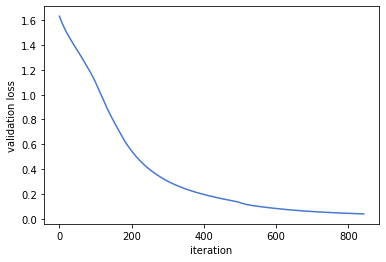

Number of mislabeled samples 1 out of 12
Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         3
         2.0       1.00      0.67      0.80         3
         3.0       1.00      1.00      1.00         3
         4.0       0.50      1.00      0.67         1

    accuracy                           0.92        12
   macro avg       0.90      0.93      0.89        12
weighted avg       0.96      0.92      0.92        12

confusion matrix
[[2 0 0 0 0]
 [0 3 0 0 0]
 [0 0 2 0 1]
 [0 0 0 3 0]
 [0 0 0 0 1]]


In [9]:
#plotting the loss curve over training iteration 
plt.plot(mlp.loss_curve_)
plt.xlabel('iteration')
plt.ylabel('validation loss')
plt.show()

#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))
print(sklearn.metrics.classification_report(lab_test, lab_predict))
print('confusion matrix')
print(sklearn.metrics.confusion_matrix(lab_test,lab_predict))

In [10]:
print(mlp.coefs_[0].shape)
print(mlp.coefs_[1].shape)
print(mlp.coefs_[2].shape)
print(mlp.out_activation_)


(20, 10)
(10, 5)
(5, 5)
softmax


In [11]:
#displaying names of misclassified files
results = lab_test == lab_predict

for index, value in results.items():
    if value == False:
        print(metadata['filename'][index],classes[int(lab_test[index])])

76e07b91.wav clarinet


### Follow-up activities

1. Train again the ANN with the same settings, and observe if/how performances changes. If yes, understand why this is happening.

2. Analyze in details the results displayed above and reconcile these with the classification task and dataset. Look at the accuracy, what gets missclassifies, inspect the trainig process (verbose mode is ON), and the displayed messages. Also, compute the the selected performance metric on the training set and compare with the result on the tests set (assess wheter overfitting or unferfitting may happen).

3. Modify the network to improve the accuracy. You can explore increasing/decreasing the number of layers, the number of neuron per layer, the maximum number of training iterations, the activation function of the neurons (try logistic or tanh), and any other option you think may be relevant (refer to the documentation of MLPClassifier).

4. Try to change the regularization (called alpha) and learning rate (refer to the [MLP Classifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)).

5. Try to work with less features, and use the [Percentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile) to decide which to keep out of the 20 MFCC averaged over the entire file duration.

6. Repeat the above explorations with your own dataset and compare the performances with other classifiers included in Workshop 3.

7. Try another classifier on your dataaet, use a classifier included in [scikitlearn](https://scikit-learn.org/stable/supervised_learning.html) but not covered in the workshops and compare the performances with other classifiers included in Workshop 3 (consider making a table as final summary of everything you have tested vs performances).